In [6]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy as np
from melbanks import LogMelFilterBanks

In [3]:
signal, sr = torchaudio.load('/content/H02_20230420_112000.wav')

In [8]:
print(f"Audio shape: {signal.shape}")
print(f"Sample rate: {sr} Hz")

Audio shape: torch.Size([1, 960000])
Sample rate: 16000 Hz


In [9]:
# Parameters
n_fft = 400
hop_length = 160
n_mels = 128

In [10]:
# Initialize our custom melspec
custom_melspec = LogMelFilterBanks(
    n_fft=n_fft,
    samplerate=sr,
    hop_length=hop_length,
    n_mels=n_mels
)

/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [12]:
# Compute mel-spectrogram with our implementation
output = custom_melspec(signal)
print(f"Output shape: {output.shape}")

Output shape: torch.Size([1, 128, 6001])


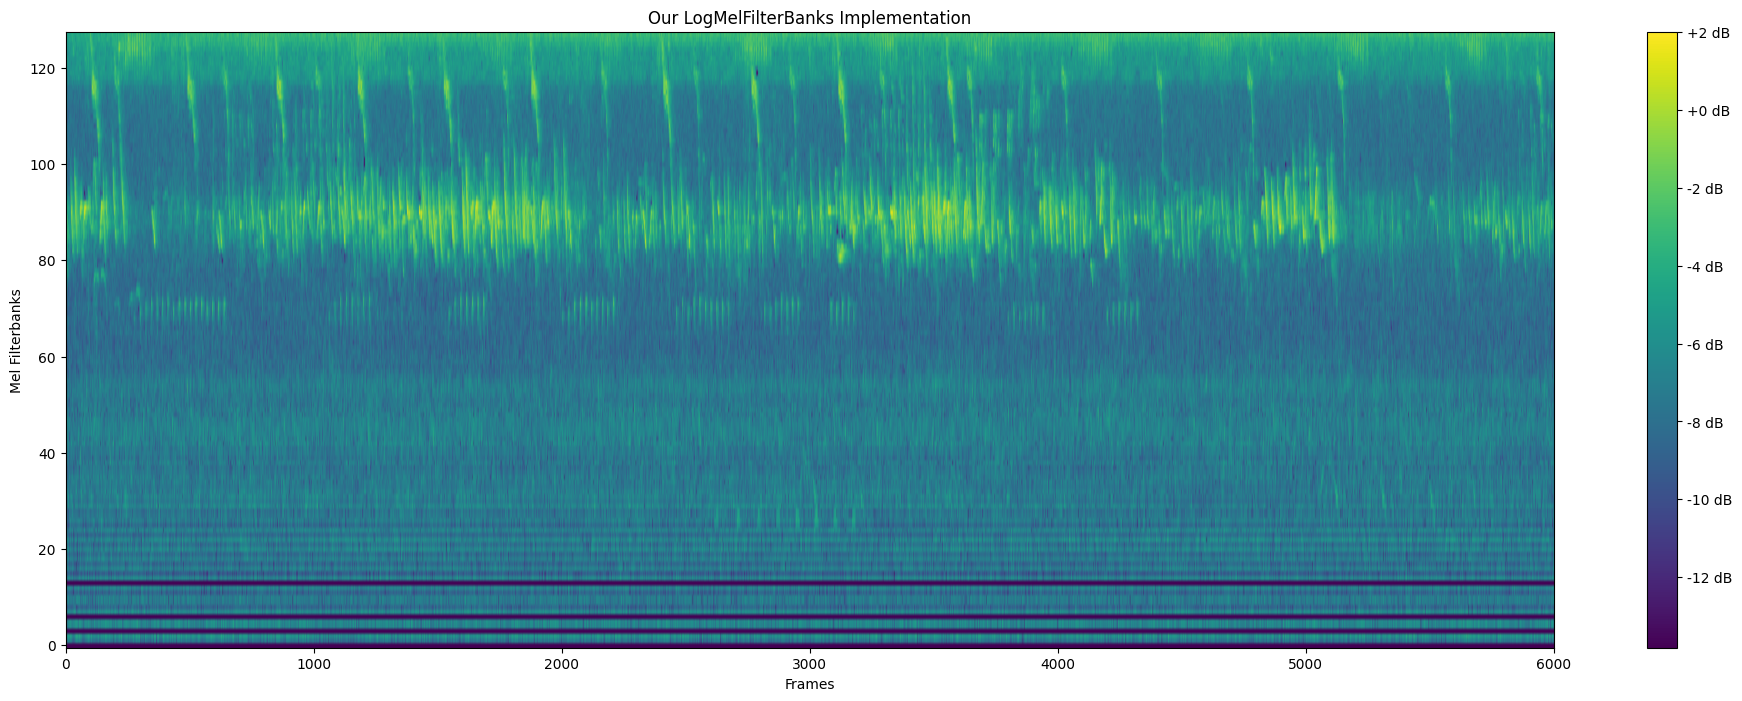

In [18]:
# Visualize results
plt.figure(figsize=(24, 8))

plt.title('Our LogMelFilterBanks Implementation')
plt.imshow(output[0].detach().numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frames')
plt.ylabel('Mel Filterbanks')
plt.show()


In [15]:
# Check with mel-spectrogram from torchaudio
torchaudio_melspec = torchaudio.transforms.MelSpectrogram(
    sample_rate=sr,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels,
    power=2.0
)
torchaudio_output = torchaudio_melspec(signal)
print(f"Torchaudio output shape: {torchaudio_output.shape}")
torchaudio_log_output = torch.log(torchaudio_output + 1e-6)

Torchaudio output shape: torch.Size([1, 128, 6001])


/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


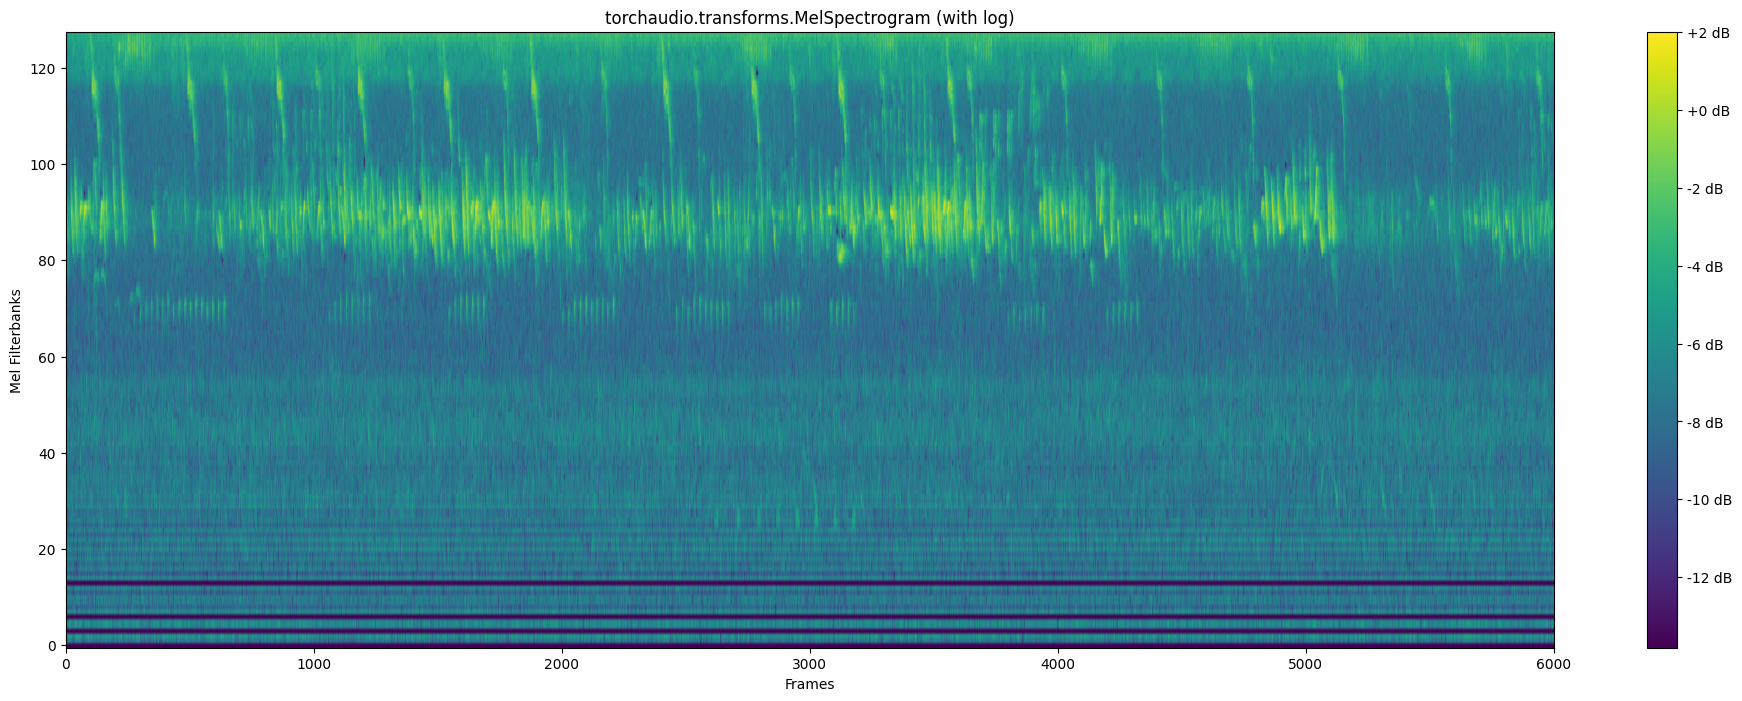

In [19]:
plt.figure(figsize=(24, 8))
plt.title('torchaudio.transforms.MelSpectrogram (with log)')
plt.imshow(torchaudio_log_output[0].detach().numpy(), aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frames')
plt.ylabel('Mel Filterbanks')
plt.show()


In [20]:
assert torch.log(torchaudio_output + 1e-6).shape == output.shape
assert torch.allclose(torch.log(torchaudio_output + 1e-6), output)